# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

* 17년도부터 21년도 까지의 데이터를 train set, 22년도의 6개월치 데이터를 test set 으로 설정합니다.

In [14]:
import pandas as pd
import os

In [15]:
# 학습 데이터 로딩
train = pd.read_csv('df_total.csv', index_col = 0)
test = pd.read_csv('df_test.csv', index_col=0)

In [16]:
train.head()

,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,year,month,weekday,day
0,2017-01-01,0,31535.2200,1945.4402,566.4588,631.5581,991.9184,1297.1287,1223.1529,1552.9448,...,998.0414,874.5643,1162.1547,1053.0477,964.3940,2025.4819,2017,1,6,1
1,2017-01-01,1,31188.9174,1930.4766,562.1018,625.2151,1030.6281,1307.7381,1183.0956,1491.5827,...,1038.7528,857.9100,1149.7532,1042.7411,919.0115,2062.2422,2017,1,6,1
2,2017-01-01,2,31240.4974,1921.1864,559.3965,658.7463,1058.7082,1311.9591,1186.2600,1537.3732,...,1020.0177,853.3890,1193.4472,1011.2073,889.9325,1960.1236,2017,1,6,1
3,2017-01-01,3,31442.4314,1946.4476,566.7525,649.0804,1057.9119,1324.2638,1202.1250,1521.2732,...,1042.9554,896.0038,1163.0355,1056.6428,891.9177,2060.1872,2017,1,6,1
4,2017-01-01,4,31922.7751,1953.7713,568.8845,623.2087,1063.2557,1342.9146,1209.2680,1556.0675,...,1045.2130,895.8336,1191.7017,1045.3362,874.4984,2038.6212,2017,1,6,1


---

# 1. 데이터 전처리

#### [실습문제1] 열 추가 
* 기존 '기준일ID'열에서 날짜 데이터를 추출하여 새로운 열로 추가 합니다.
    - pd.to_datetime() 함수를 사용해 '기준일ID'열을 datetime 형식으로 변경하겠습니다.
    - year, month, day 열로 기존 데이터 프레임에 연월일 정보를 저장합니다.
    - 데이터 프레임 열에 대해 날짜 정보를 얻을 때에는 **dt.year**, **dt.month**, **dt.day** 속성을 사용합니다. 

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train['holiday'] = train['weekday'].map(lambda x : 0  if x in range(0,5) else 1)
test['holiday'] = test['weekday'].map(lambda x : 0  if x in range(0,5) else 1)

train['기준일ID'] = pd.to_datetime(train['기준일ID'])
test['기준일ID'] = pd.to_datetime(test['기준일ID'])

#### [실습문제2] 불필요한 열 제거 및 열 이름 변경
* df_total과 df_test에서 '총생활인구수'외에 불필요한 열을 제거 하도록 하겠습니다.
* 시간 데이터를 남기고, '시간대구분' column 을 'hour'로 rename 하도록 하겠습니다. 

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train = train.rename({'시간대구분':'hour'}, axis = 1)
test = test.rename({'시간대구분':'hour'}, axis = 1)

train = train[['기준일ID','weekday','month','year','day', '총생활인구수']]
test = test[['기준일ID','weekday','month','year','day','총생활인구수']]

#### [실습문제3] 시프트 & 롤링
* shift()를 활용하여 이동할 행 수를 지정합니다.
* rolling()을 활용하여 추가할 이동평균 수를 지정합니다.

In [19]:
train

,기준일ID,weekday,month,year,day,총생활인구수
0,2017-01-01,6,1,2017,1,31535.2200
1,2017-01-01,6,1,2017,1,31188.9174
2,2017-01-01,6,1,2017,1,31240.4974
3,2017-01-01,6,1,2017,1,31442.4314
4,2017-01-01,6,1,2017,1,31922.7751
...,...,...,...,...,...,...
43507,2021-12-31,4,12,2021,31,33060.4555
43508,2021-12-31,4,12,2021,31,32360.1898
43509,2021-12-31,4,12,2021,31,31417.3991
43510,2021-12-31,4,12,2021,31,30763.0563


In [20]:
k = train.groupby(['year','month','day'],as_index=False).mean()
date_1 = k['year'].astype(str) + \
        k['month'].astype(str).map(lambda x : '0' + x if len(x) == 1 else x) + \
        k['day'].astype(str).map(lambda x : '0' + x if len(x) == 1 else x)
for i in list(pd.date_range('2017-01-01','2021-12-31',freq='D').strftime("%Y%m%d")):
    if i not in list(date_1):
        print(i)

C:\Users\SIK\AppData\Local\Temp\ipykernel_27656\2785297563.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  k = train.groupby(['year','month','day'],as_index=False).mean()


20191015
20191016
20191017
20191018
20191019
20191020
20191021
20191022
20191023
20191024
20191025
20191026
20191027


In [21]:
new_train = train.set_index(['기준일ID']).resample('D').mean().fillna(method = 'ffill')
new_test = test.set_index(['기준일ID']).resample('D').mean()

In [22]:
new_train

,weekday,month,year,day,총생활인구수
기준일ID,,,,,
2017-01-01,6.0,1.0,2017.0,1.0,35344.252200
2017-01-02,0.0,1.0,2017.0,2.0,37702.314204
2017-01-03,1.0,1.0,2017.0,3.0,37872.095279
2017-01-04,2.0,1.0,2017.0,4.0,37613.476712
2017-01-05,3.0,1.0,2017.0,5.0,37646.361725
...,...,...,...,...,...
2021-12-27,0.0,12.0,2021.0,27.0,35818.511192
2021-12-28,1.0,12.0,2021.0,28.0,35554.590196
2021-12-29,2.0,12.0,2021.0,29.0,35626.662900


#### [실습문제4] 결측치 처리 및 불필요한 열 제거
* 롤링 & 시프트 과정에서 발생한 결측치를 처리하도록 하겠습니다.
* 불필요한 열을 추가로 제거 하겠습니다.(시간 관련 행들)

In [23]:
tmp_df = pd.concat([new_train,new_test])
tmp_df

,weekday,month,year,day,총생활인구수
기준일ID,,,,,
2017-01-01,6.0,1.0,2017.0,1.0,35344.252200
2017-01-02,0.0,1.0,2017.0,2.0,37702.314204
2017-01-03,1.0,1.0,2017.0,3.0,37872.095279
2017-01-04,2.0,1.0,2017.0,4.0,37613.476712
2017-01-05,3.0,1.0,2017.0,5.0,37646.361725
...,...,...,...,...,...
2022-06-26,6.0,6.0,2022.0,26.0,33215.527296
2022-06-27,0.0,6.0,2022.0,27.0,35328.101587
2022-06-28,1.0,6.0,2022.0,28.0,34600.929596


In [24]:
tmp_df['shift1'] = tmp_df['총생활인구수'].shift(1)
tmp_df['shift2'] = tmp_df['총생활인구수'].shift(2)
tmp_df['shift3'] = tmp_df['총생활인구수'].shift(3)
tmp_df['rolling3'] = tmp_df['총생활인구수'].rolling(3).mean().shift(1)
tmp_df['target'] = tmp_df['총생활인구수']
tmp_df.drop(['year', 'day','총생활인구수'], axis=1,inplace = True)
tmp_df.dropna(inplace=True)
tmp_df

,weekday,month,shift1,shift2,shift3,rolling3,target
기준일ID,,,,,,,
2017-01-04,2.0,1.0,37872.095279,37702.314204,35344.252200,36972.887228,37613.476712
2017-01-05,3.0,1.0,37613.476712,37872.095279,37702.314204,37729.295399,37646.361725
2017-01-06,4.0,1.0,37646.361725,37613.476712,37872.095279,37710.644572,37068.827046
2017-01-07,5.0,1.0,37068.827046,37646.361725,37613.476712,37442.888494,35338.538679
2017-01-08,6.0,1.0,35338.538679,37068.827046,37646.361725,36684.575817,35241.377033
...,...,...,...,...,...,...,...
2022-06-26,6.0,6.0,32961.650487,35423.596512,35320.113829,34568.453610,33215.527296
2022-06-27,0.0,6.0,33215.527296,32961.650487,35423.596512,33866.924765,35328.101587
2022-06-28,1.0,6.0,35328.101587,33215.527296,32961.650487,33835.093124,34600.929596


In [25]:
len(new_train)

1826

In [26]:
x_train = tmp_df.loc[:'2021-12-31',:'rolling3']
x_test = tmp_df.loc['2021-01-01':,:'rolling3']
y_train = tmp_df.loc[:'2021-12-31','target']
y_test = tmp_df.loc['2021-01-01':,'target']

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1823, 6), (546, 6), (1823,), (546,))

## 다음 단계를 위해서 데이터를 저장하겠습니다.

In [27]:
x_train.to_csv('x_train.csv', index = False)
x_test.to_csv('x_test.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

# arima

In [ ]:
kkk = train.set_index(['기준일ID']).resample('D').mean()
boo_ = kkk.index == pd.to_datetime('2019-10-27')
kkk.loc[boo_]

In [160]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
number = kkk['총생활인구수'].fillna(method = 'ffill')
number

기준일ID
2017-01-01    35344.252200
2017-01-02    37702.314204
2017-01-03    37872.095279
2017-01-04    37613.476712
2017-01-05    37646.361725
                  ...     
2021-12-27    35818.511192
2021-12-28    35554.590196
2021-12-29    35626.662900
2021-12-30    35385.912696
2021-12-31    35179.675287
Freq: D, Name: 총생활인구수, Length: 1826, dtype: float64

In [161]:
import pmdarima as pm

kpss_diffs = pm.arima.ndiffs(number, alpha=0.05, test='kpss', max_d=5)
adf_diffs = pm.arima.ndiffs(number, alpha=0.05, test='adf', max_d=5)
n_diffs = max(kpss_diffs, adf_diffs)

print(f"Optimized 'd' = {n_diffs}")

Optimized 'd' = 1


In [208]:
model = pm.auto_arima(y=number,		# 데이터
                      d=n_diffs,	# 차분 (d), 기본값 = None
                      start_p= 2,	# 시작 p값, 기본값 = 2
                      max_p = 5,	# p 최대값, 기본값 = 5
                      start_q= 2,	# 시작 q값, 기본값 = 2
                      max_q = 5,	# q 최대값, 기본값 = 5
                      m=12,			# season의 주기, 기본값 = 1
                      seasonal=True,	# sARIMA를 실시, 기본값 = True
                      stepwise=True,	# stepwise algorithm, 기본값 = True
                      trace=True)		# 각 step을 출력할지, 기본값 = False

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=31244.322, Time=5.11 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=31840.588, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=31709.134, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=31677.566, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=31838.589, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=31242.975, Time=4.13 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=31383.425, Time=1.83 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=31244.783, Time=14.30 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=31243.737, Time=5.40 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=13.67 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=31314.724, Time=5.27 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=31291.672, Time=4.84 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=31296.510, Time=7.82 sec
 ARIMA(2,1,3)(0,0,1)[12] intercept   : AIC=31061.254, Time=6.24 sec
 ARIMA(2,

In [209]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1826
Model:             SARIMAX(5, 1, 4)x(1, 0, [], 12)   Log Likelihood              -15246.688
Date:                             Thu, 12 Oct 2023   AIC                          30515.377
Time:                                     14:50:18   BIC                          30575.979
Sample:                                 01-01-2017   HQIC                         30537.732
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5289      0.021     25.681      0.000       0.489       0.569
ar.L2         -1.2198      0.015    -81.981      0.000      -1.249      -1.191
ar.L3          0.4207      0.028     14.952      0.000       0.366       0.476
ar.L4         -0.7685      0.015    -49.790      0.000      -0.799      -0.738
ar.L5         -0.2589      0.018    -14.277      0.000      -0.294      -0.223
ma.L1         -0.7624      0.017    -46.088      0.000      -0.795      -0.730
ma.L2          1.3505      0.013    105.148      0.000       1.325       1.376
ma.L3         -0.7764      0.014    -53.826      0.000      -0.805      -0.748
ma.L4          0.8832      0.015     59.879      0.000       0.854       0.912
ar.S.L12       0.0783      0.027      2.939      0.003       0.026       0.131
sigma2      1.355e+06   1.07e-08   1.27e+14      0.000    1.35e+06    1.35e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):              1270.73
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.28e+29. Standard errors may be unstable.
"""

In [210]:
model.predict(n_periods=181)

2022-01-01    33847.596269
2022-01-02    33901.894713
2022-01-03    35189.598345
2022-01-04    35263.066609
2022-01-05    34853.877431
                  ...     
2022-06-26    34382.824870
2022-06-27    35133.198284
2022-06-28    34889.105515
2022-06-29    34429.801748
2022-06-30    34992.680034
Freq: D, Length: 181, dtype: float64

In [211]:
real = test.set_index(['기준일ID']).resample('D').mean()['총생활인구수']

In [212]:
# 예측 -> 리스트로 변환
pred = model.predict(n_periods=181).to_list()
# 데이터프레임 생성
test_pred = pd.DataFrame({'test':real, 'pred':pred})
test_pred

,test,pred
기준일ID,,
2022-01-01,32012.886975,33847.596269
2022-01-02,33840.864696,33901.894713
2022-01-03,35721.619904,35189.598345
2022-01-04,35443.178746,35263.066609
2022-01-05,35321.249925,34853.877431
...,...,...
2022-06-26,33215.527296,34382.824870
2022-06-27,35328.101587,35133.198284
2022-06-28,34600.929596,34889.105515


In [205]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

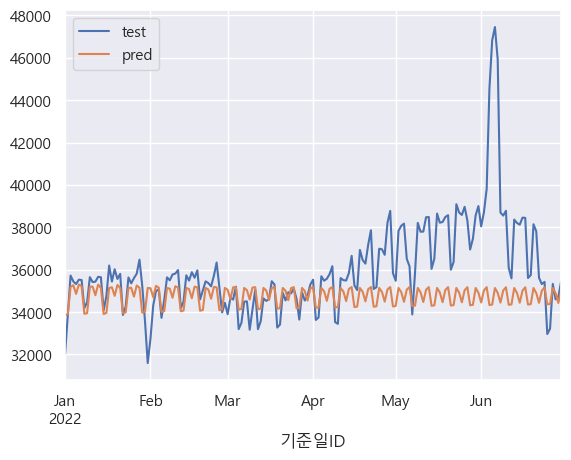

In [213]:
test_pred.plot();